In [127]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [128]:
#import all the things

%reset
import phys_map as pm
import DAY_yvel_map as Dym
import netCDF4 as nc
import matplotlib.pyplot as plt
import datetime
import os
import numpy as np
import cmocean as cm
from salishsea_tools import visualisations as vis
from salishsea_tools import (teos_tools, tidetools, viz_tools, geo_tools)
import xarray as xr 
import subprocess 
import cmocean
from matplotlib import reload
import glob
from scipy.io import loadmat
import netCDF4 as nc
"NOT TESTED"
import netCDF4 as nc
import matplotlib.pyplot as plt
import datetime
import os
import numpy as np
import cmocean as cm
from salishsea_tools import visualisations as vis
from salishsea_tools import (teos_tools, tidetools, viz_tools)
import cmocean
import glob

%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [129]:
reload(Dym)

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'DAY_yvel_map' from '/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/APRIL_EXP/DAY_yvel_map.py'>


## Figure C

the physical circulation - we need to show the signal of a discrete watermass, ideally from several angles, to succinctly convince the reader that this circulation happens

    u/v speed at a cross  section at station 42, with a bar through the cross section pointing out where station 42 is.

##### Stn 42 coords
        
          49.03, -123.49

In [130]:
thistime = nc.Dataset('/data/tjarniko/results/may10_a1/timecount_1h.nc')
us = nc.Dataset('/data/tjarniko/results/may10_a1/u_1h.nc')
vs = nc.Dataset('/data/tjarniko/results/may10_a1/v_1h.nc')
depthus = nc.Dataset('/data/tjarniko/results/may10_a1/zlevels_1h.nc')

ugrid = us.variables['vozocrtx']
vgrid = vs.variables['vomecrty']
zlevels = depthus.variables['depthu']
timesteps = thistime.variables['time_counter']



In [131]:
# print(np.max(vgrid[:]))
# # print(np.min(vgrid[:]))

In [132]:
# #STN 42 
# lon = -123.49
# lat = 49.03

# model_lons = us.variables['nav_lon'][:]
# model_lats = us.variables['nav_lat'][:]

# j, i = geo_tools.find_closest_model_point(lon, lat, model_lons, model_lats, grid='NEMO', land_mask=None, tols={
#         'NEMO': {'tol_lon': 0.0104, 'tol_lat': 0.00388},
#         'GEM2.5': {'tol_lon': 0.016, 'tol_lat': 0.012},
#         }
# )
# print(j)
# print(i)
# t_modlon = us.variables['nav_lon'][426,255]
# t_modlat = us.variables['nav_lat'][426,255]

# #haversine(lon1, lat1, lon2, lat2):
# dist = geo_tools.haversine(lon,lat,t_modlon,t_modlat)
# print('Stn 42, real-life lon, lat:')
# print(lon)
# print(lat)
# print('Closest model point lon, lat:')
# print(t_modlon)
# print(t_modlat)
# print('Distance between them')
# print(dist)



In [133]:
# def nice_42_plot(tit1, tit2, plotdat, t, v_min, v_max, tcmap, clabel):

#     fig, (axl, axr) = plt.subplots(1, 2, figsize=(15, 8 ))
#     land_colour = 'whitesmoke'

#     physdat = nc.Dataset('/data/tjarniko/results/may10_a1/tn_1h.nc')
#     zlevels = physdat.variables['deptht']

#     # Define the component slice to plot
#     zmax, ylocn = 41, 424
#     section_slice = np.arange(208, 293)

#     pdat = np.ma.masked_values(plotdat[t,:,424,section_slice],0)
    
#     cmap = tcmap
#     #cmap.set_bad(land_colour)
#     #cmap.set_bad('whitesmoke')
#     mesh = axl.pcolormesh(
#         section_slice[:], zlevels[:zmax], pdat,
#         cmap=cmap, vmin=v_min, vmax=v_max,
#     )
#     axl.invert_yaxis()
#     cbar = fig.colorbar(mesh, ax=axl)
#     cbar.set_label(clabel)

#     # Axes labels and title
#     axl.set_xlabel('x Index')
#     axl.set_ylabel('depth (m)')
#     axl.set_title(tit1)

#     # Axes limits and grid
#     axl.set_xlim(section_slice[1], section_slice[-1])
#     axl.set_ylim(zlevels[zmax - 2] + 10, 0)
#     axl.set_facecolor(land_colour)
#     axl.grid()

#     # Define surface current magnitude slice
#     x_slice = np.arange(0, 398)
#     y_slice = np.arange(0, 898)
#     line_s = np.arange(0,398)

    
#     surf_dat =  np.ma.masked_values(plotdat[t, 0, y_slice, x_slice], 0)
    
#     viz_tools.set_aspect(axr)
#     axr.plot(
#         line_s, 424*np.ones_like(line_s),
#         linestyle='solid', linewidth=3, color='black',
#         label='Section Line',
#     )
    
#     cmap.set_bad(land_colour)

#     mesh = axr.pcolormesh(surf_dat, cmap=tcmap, vmin = v_min, vmax = v_max)

#     axr.set_xlabel('')
#     axr.set_ylabel('')
#     axr.set_xticks([])
#     axr.set_yticks([])
#     axr.set_title(tit2)
#     legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
#     axr.grid()
#     plt.suptitle('WAAAALRUSSSS')

In [134]:
plotdat = vgrid

tcmap = cm.cm.balance
v_min = -0.2
v_max = 0.2
depths = depthus
t = 0
indexer = 0
clabel = 'something'
dirstr = './APR_yvel_day/'
figtit = 'YVEL_day_'

In [135]:
Dym.nice_42_plot(plotdat, t, v_min, v_max, tcmap, dirstr, figtit, indexer)

January 1, 2016, (0 days since January 1, 2016)


index
0
/data/tjarniko/results/may10_a1/
number of frames
(15,)
15
January 1, 2016, (0 days since January 1, 2016)
January 2, 2016, (1 days since January 1, 2016)


KeyboardInterrupt: 

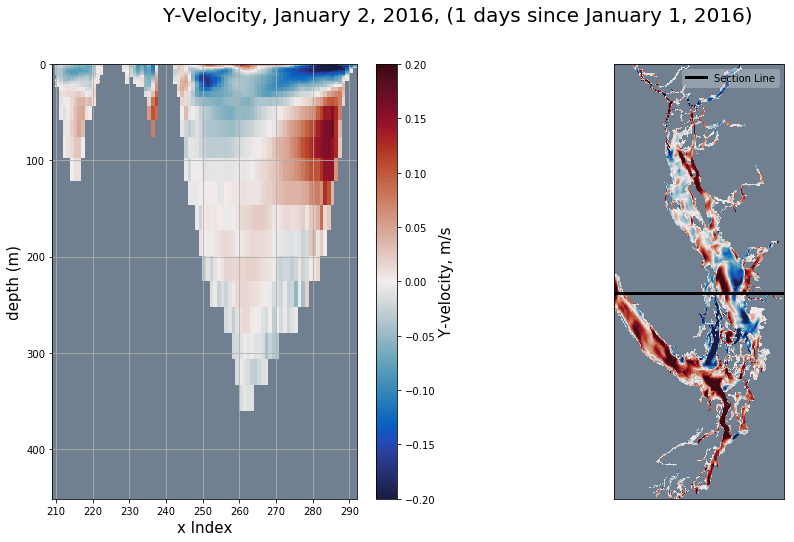

In [136]:
segment = 0
resdir = 'may10_a1/'
Dym.MRAP(resdir,dirstr,figtit,segment)

In [137]:
# resdir = '/data/tjarniko/results/may10_a1'
# subprocess.call('ncks -v vozocrtx SKOG_1h_20160101_20160115_grid_U.nc u_1h.nc', shell=True,cwd=resdir)
# print('u')
# subprocess.call('ncks -v time_counter SKOG_1h_20160101_20160115_grid_U.nc timecount_1h.nc', shell=True,cwd=resdir)
# print('t')
# subprocess.call('ncks -v vomecrty SKOG_1h_20160101_20160115_grid_V.nc v_1h.nc', shell=True,cwd=resdir)
# print('v')

# print('a2')

# resdir = '/data/tjarniko/results/may10_a2'

# subprocess.call('ncks -v vozocrtx SKOG_1h_20160116_20160130_grid_U.nc u_1h.nc', shell=True,cwd=resdir)
# print('u')
# subprocess.call('ncks -v time_counter SKOG_1h_20160116_20160130_grid_U.nc timecount_1h.nc', shell=True,cwd=resdir)
# print('t')
# subprocess.call('ncks -v vomecrty SKOG_1h_20160116_20160130_grid_V.nc v_1h.nc', shell=True,cwd=resdir)
# print('v')

# resdir = '/data/tjarniko/results/may10_a3'
# subprocess.call('ncks -v vozocrtx SKOG_1h_20160131_20160214_grid_U.nc u_1h.nc', shell=True,cwd=resdir)
# print('u')
# subprocess.call('ncks -v time_counter SKOG_1h_20160131_20160214_grid_U.nc timecount_1h.nc', shell=True,cwd=resdir)
# print('t')
# subprocess.call('ncks -v vomecrty SKOG_1h_20160131_20160214_grid_V.nc v_1h.nc', shell=True,cwd=resdir)
# print('v')

# print('a3')

# resdir = '/data/tjarniko/results/may10_a4'
# subprocess.call('ncks -v vozocrtx SKOG_1h_20160214_20160229_grid_U.nc u_1h.nc', shell=True,cwd=resdir)
# print('u')
# subprocess.call('ncks -v time_counter SKOG_1h_20160214_20160229_grid_U.nc timecount_1h.nc', shell=True,cwd=resdir)
# print('t')
# subprocess.call('ncks -v vomecrty SKOG_1h_20160214_20160229_grid_V.nc v_1h.nc', shell=True,cwd=resdir)
# print('v')

# print('a4')



# print('a5')

In [ ]:
resdir = '/data/tjarniko/results/may10_a6'
subprocess.call('ncks -v vozocrtx SKOG_1h_20160316_20160330_grid_U.nc u_1h.nc', shell=True,cwd=resdir)
print('u')
subprocess.call('ncks -v time_counter SKOG_1h_20160316_20160330_grid_U.nc timecount_1h.nc', shell=True,cwd=resdir)
print('t')
subprocess.call('ncks -v vomecrty SKOG_1h_20160316_20160330_grid_V.nc v_1h.nc', shell=True,cwd=resdir)
print('v')